In [6]:
import imutils
from skimage import exposure
import numpy as np
import argparse
import imutils
import cv2
import os
import time
import glob
import matplotlib.pyplot as plt 

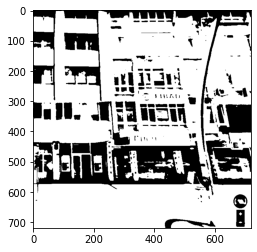

In [7]:
cups = cv2.imread('r2.jpg')

# preprocess by blurring and grayscale
cups_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(cups, (7,7), 0), cv2.COLOR_BGR2GRAY)

# find binary image with thresholding
_, cups_thresh = cv2.threshold(cups_preprocessed, 80, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(cups_thresh, cv2.COLOR_GRAY2RGB))

True

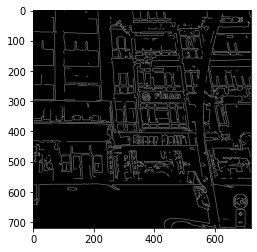

In [9]:
cups_edges = cv2.Canny(cups_preprocessed, threshold1=90, threshold2=110)
plt.imshow(cv2.cvtColor(cups_edges, cv2.COLOR_GRAY2RGB))
cv2.imwrite('cups-edges.jpg', cups_edges)

In [10]:
cups_lines = np.copy(cups)

# find hough lines
num_pix_threshold = 110 # minimum number of pixels that must be on a line
lines = cv2.HoughLines(cups_edges, 1, np.pi/180, num_pix_threshold)

for rho, theta in lines[0]:
    # convert line equation into start and end points of line
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho

    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))

    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(cups_lines, (x1,y1), (x2,y2), (0,0,255), 1)

In [11]:
cv2.imshow("line", cups_lines)


cv2.waitKey(0)
cv2.destroyAllWindows()